<a href="https://colab.research.google.com/github/DayrisRM/Breast_Cancer_Detection_Neural_Networks/blob/main/Breast_Cancer_1995Dataset_Neural_networks_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("/content/wdbc.csv", sep=",")
df

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,...,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [11]:
df = df.drop("id", axis=1)
df = df.drop(df.columns[-1], axis=1)
df

,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,sy11etry_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
df.columns.values

array(['diagnosis', 'radius_1ean', 'texture_1ean', 'peri1eter_1ean',
       'area_1ean', 's1oothness_1ean', 'co1pactness_1ean',
       'concavity_1ean', 'concave points_1ean', 'sy11etry_1ean',
       'fractal_di1ension_1ean', 'radius_se', 'texture_se',
       'peri1eter_se', 'area_se', 's1oothness_se', 'co1pactness_se',
       'concavity_se', 'concave points_se', 'sy11etry_se',
       'fractal_di1ension_se', 'radius_worst', 'texture_worst',
       'peri1eter_worst', 'area_worst', 's1oothness_worst',
       'co1pactness_worst', 'concavity_worst', 'concave points_worst',
       'sy11etry_worst', 'fractal_di1ension_worst'], dtype=object)

In [27]:
X = df.drop("diagnosis", axis=1) # all columns except diagnosis
y = df["diagnosis"] # only diagnosis column

In [85]:
print(X.shape[1])
print(df.shape[1])

30
31


In [28]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [30]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                       train_size=0.7,
                       test_size=0.3,
                       random_state=42,
                       stratify=y)

In [31]:
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_labels) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels) / float(len(test_labels)) * 100.0)
     

All: [62.74165202 37.25834798]
Training: [62.81407035 37.18592965]
Test: [62.57309942 37.42690058]


In [34]:
print('Train date:', len(X))
print('Train date:', len(y))

Train date: 569
Train date: 569


In [35]:
print('Train date:', len(train_data))
print('Test date:', len(test_data))

Train date: 398
Test date: 171




---



**Neural network with 2 hidden layers and 1 output layer**

In [36]:
# Import the sequential model and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [69]:
# Create a sequential model
model1 = Sequential()

In [70]:
# neural network architecture
model1 = Sequential()
model1.add(Dense(12, input_dim=30, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))


In [86]:
# Compile your model
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [87]:
# Display a summary of your model
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                372       
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [88]:
# Train your model for 100 epochs
history_model1 = model1.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 23ms/step - loss: 0.6600 - accuracy: 0.6281 - val_loss: 0.6612 - val_accuracy: 0.6257
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6600 - accuracy: 0.6281 - val_loss: 0.6612 - val_accuracy: 0.6257
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6600 - accuracy: 0.6281 - val_loss: 0.6612 - val_accuracy: 0.6257
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.6600 - accuracy: 0.6281 - val_loss: 0.6612 - val_accuracy: 0.6257
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6600 - accuracy: 0.6281 - val_loss: 0.6612 - val_accuracy: 0.6257
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6600 - accuracy: 0.6281 - val_loss: 0.6612 - val_accuracy: 0.6257
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6600 - accuracy: 0.6281 - val_loss: 0.6612 - val_accuracy: 0.6257
Epoch 8/100

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

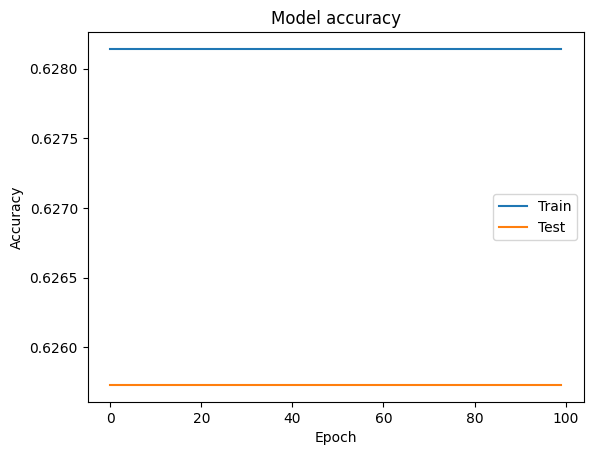

In [90]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [91]:
# Evaluate the model
_, accuracy = model1.evaluate(test_data, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

6/6 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.6257
Accuracy: 62.57


In [92]:
from sklearn.metrics import confusion_matrix

# Predict class for test data
y_pred = model1.predict(test_data)
y_pred = (y_pred > 0.5)

# Generate confusion matrix
confusion_matrix_m1 = confusion_matrix(test_labels, y_pred)
print(confusion_matrix_m1)


6/6 [==============================] - 0s 4ms/step
[[107   0]
 [ 64   0]]


[[107   0]
 [ 64   0]]


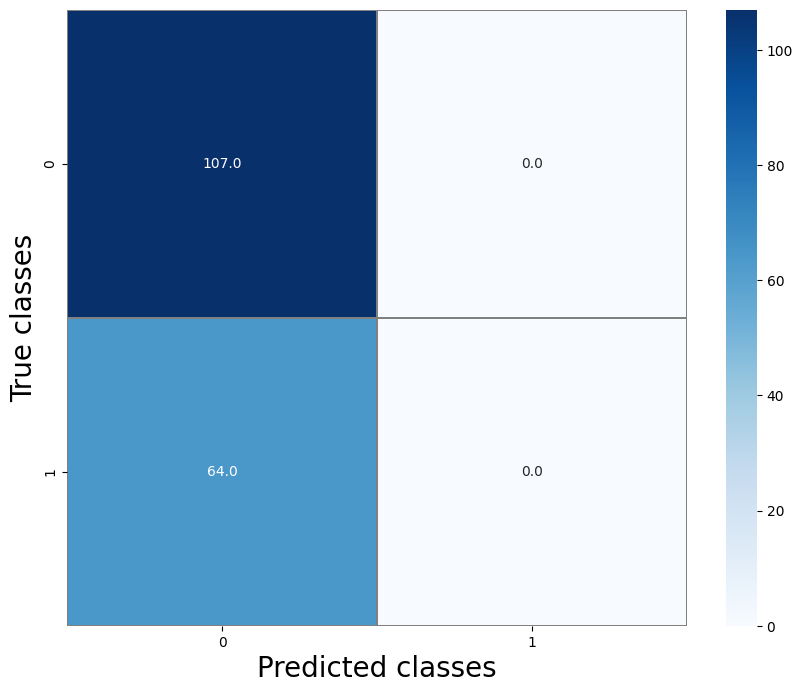

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

#Print confusion matrix
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix_m1, linewidths = 0.1, cmap = 'Blues', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)
print(confusion_matrix_m1)



---



Neural network v2 -- Same architecture with Adam optimizer and callbacks: {EarlyStopping, ReduceLROnPlateau}

In [52]:
# Create a sequential model
model2 = Sequential()     

In [59]:
# neural network architecture
model2 = Sequential()
model2.add(Dense(12, input_dim=30, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [60]:
from keras.optimizers import Adam
model2.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [61]:
model2.summary()     

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                372       
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [62]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4)

In [63]:
# fit model
history_model2 = model2.fit(train_data, train_labels,
           validation_data=(test_data, test_labels),
           epochs = 100, verbose=1, callbacks=[es, rlrop])

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 69.3306 - accuracy: 0.6281 - val_loss: 54.9774 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 44.5887 - accuracy: 0.6281 - val_loss: 31.0293 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 20.4582 - accuracy: 0.6005 - val_loss: 8.9629 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 7.4855 - accuracy: 0.2638 - val_loss: 8.0506 - val_accuracy: 0.3684 - lr: 0.0010
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 6.8717 - accuracy: 0.2940 - val_loss: 5.2610 - val_accuracy: 0.1696 - lr: 0.0010
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 5.0817 - accuracy: 0.1608 - val_loss: 4.8016 - val_accuracy: 0.1871 - lr: 0.0010
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - los

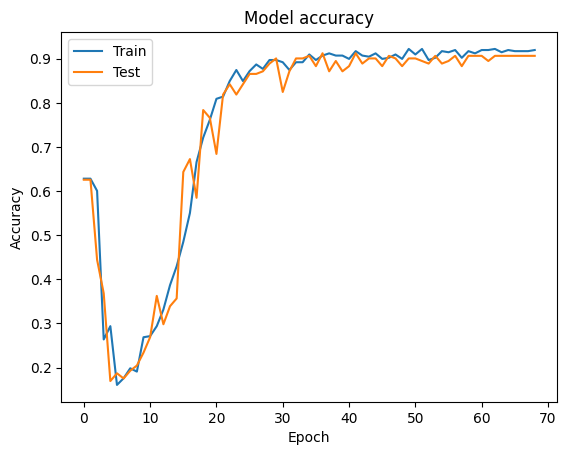

In [64]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
     

In [65]:
# Evaluate the model
_, accuracy_m2 = model2.evaluate(test_data, test_labels)
print('Accuracy: %.2f' % (accuracy_m2*100))

6/6 [==============================] - 0s 5ms/step - loss: 0.2440 - accuracy: 0.9064
Accuracy: 90.64


In [66]:
# Predict class for test data
y_pred_m2 = model2.predict(test_data)
y_pred_m2 = (y_pred_m2 > 0.5)

6/6 [==============================] - 0s 4ms/step


In [67]:
# Generate confusion matrix
confusion_matrix_m2 = confusion_matrix(test_labels, y_pred_m2)
print(confusion_matrix_m2)

[[105   2]
 [ 14  50]]


[[105   2]
 [ 14  50]]


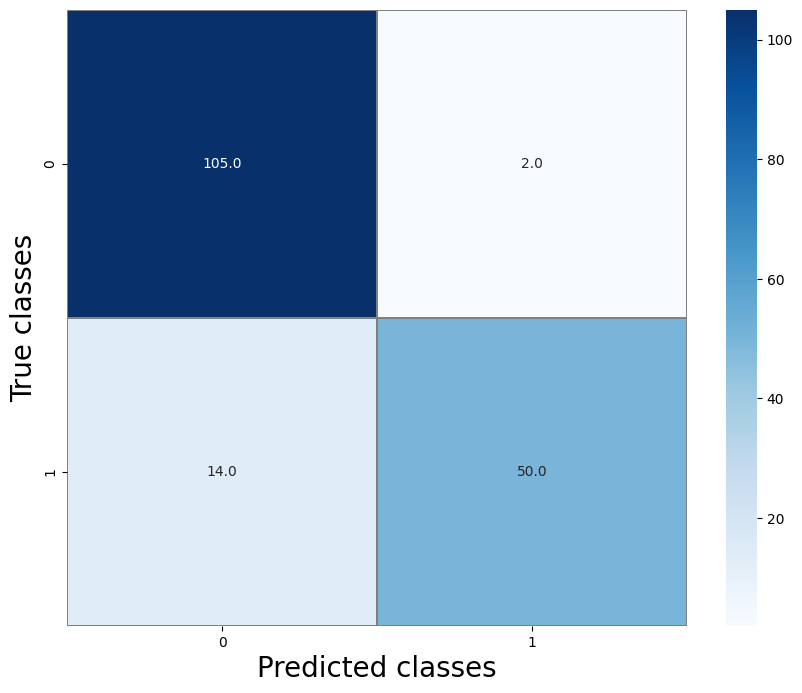

In [68]:
#Print confusion matrix
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix_m2, linewidths = 0.1, cmap = 'Blues', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)
print(confusion_matrix_m2)